In [90]:
import pandas as pd           #Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('df_completo.csv')  #Leemos el dataset
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

In [91]:
X = df_scaled.drop(['fecha_hecho', 'tipo_delito', 'categoria_delito', 'IDS_AdecEnergetica', 'IDS_SeguridadSocial', #Eliminamos las columnas que no agregan info a nuestra valor a predecir
             'IDS_BienesDurables', 'IDS_Telecomunicaciones', 'IDS_Salud', 'IDS_AdecSanitaria', 'Estado_IDS'], axis=1)
y = df_scaled['tipo_delito']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle = False)    #Separamos los datos en entrenamiento y test

In [92]:
model = LinearRegression()    #Entrenamos la regresión
model.fit(X_train, y_train)

LinearRegression()

R^2 ajustado: 0.9044312659726157


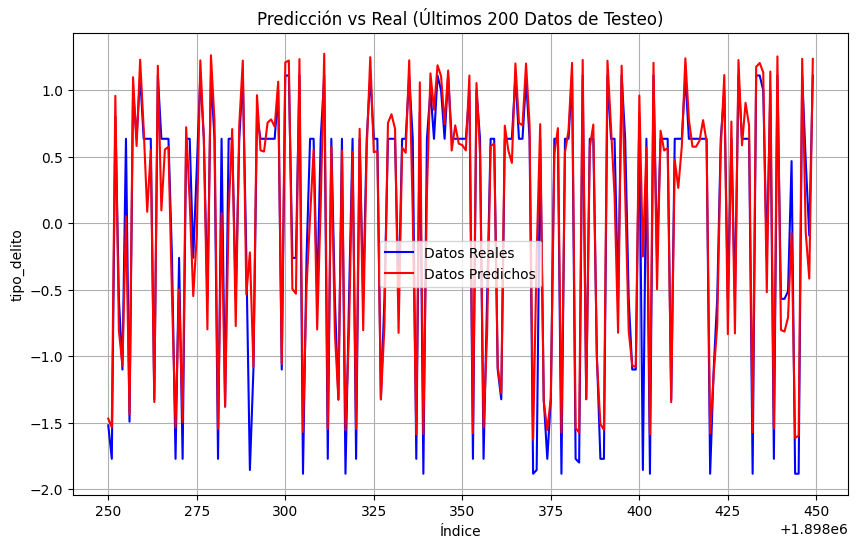

In [93]:
y_train_pred = model.predict(X_train)     #Realizamos predicciones
y_test_pred = model.predict(X_test)

score = r2_score(y_test, y_test_pred)     #Calculamos el R^2
score_adj = 1 - ((1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print(f"R^2 ajustado: {score_adj}")

num_points = 200                          #Graficamos los últimos 200 datos para facilidad
X_test_recent = X_test[-num_points:]
y_test_recent = y_test[-num_points:]
y_test_pred_recent = y_test_pred[-num_points:]


plt.figure(figsize=(10, 6))
plt.plot(y_test_recent.index, y_test_recent, label='Datos Reales', color='blue')
plt.plot(y_test_recent.index, y_test_pred_recent, label='Datos Predichos', color='red')
plt.title('Predicción vs Real (Últimos 200 Datos de Testeo)')
plt.xlabel('Índice')
plt.ylabel('tipo_delito')
plt.legend()
plt.grid(True)
plt.show()